<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Relevant-Dataset-and-Libraries" data-toc-modified-id="Importing-Relevant-Dataset-and-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Relevant Dataset and Libraries</a></span></li><li><span><a href="#RFM-Analysis-for-Targeted-Marketing" data-toc-modified-id="RFM-Analysis-for-Targeted-Marketing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RFM Analysis for Targeted Marketing</a></span><ul class="toc-item"><li><span><a href="#Recency" data-toc-modified-id="Recency-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Recency</a></span></li><li><span><a href="#Frequency" data-toc-modified-id="Frequency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Frequency</a></span></li><li><span><a href="#Monetary" data-toc-modified-id="Monetary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Monetary</a></span></li><li><span><a href="#Plot-RFM-distribution-and-count" data-toc-modified-id="Plot-RFM-distribution-and-count-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot RFM distribution and count</a></span></li><li><span><a href="#Group-into-RFM" data-toc-modified-id="Group-into-RFM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Group into RFM</a></span></li><li><span><a href="#Likelihood-of-responding-to-marketing-offers" data-toc-modified-id="Likelihood-of-responding-to-marketing-offers-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Likelihood of responding to marketing offers</a></span></li></ul></li><li><span><a href="#Top-5-Groups" data-toc-modified-id="Top-5-Groups-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Top 5 Groups</a></span></li><li><span><a href="#Bottom-5-Groups" data-toc-modified-id="Bottom-5-Groups-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottom 5 Groups</a></span></li></ul></div>

# Importing Relevant Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import collections
from collections import Counter
import copy
from datetime import datetime as dt
pd.set_option("display.max_column", None)

In [2]:
df_contacts = pd.read_csv("DMEFExtractContactsV01.CSV")
df_summary = pd.read_csv("DMEFExtractSummaryV01.CSV")

In [3]:
df_contacts.head()

,Cust_ID,ContactDate,ContactType
0,22120,20070907,C
1,22120,20071101,C
2,22120,20071011,C
3,22120,20071122,C
4,22120,20071206,C


In [4]:
df_summary.head()

,Cust_ID,SCF_Code,RetF07Dollars,RetF07Trips,RetF07Lines,RetS07Dollars,RetS07Trips,RetS07Lines,RetF06Dollars,RetF06Trips,RetF06Lines,RetS06Dollars,RetS06Trips,RetS06Lines,RetF05Dollars,RetF05Trips,RetF05Lines,RetS05Dollars,RetS05Trips,RetS05Lines,RetF04Dollars,RetF04Trips,RetF04Lines,RetS04Dollars,RetS04Trips,RetS04Lines,RetPre04Dollars,RetPre04Trips,RetPre04Lines,RetPre04Recency,IntF07GDollars,IntF07NGDollars,IntF07Orders,IntF07Lines,IntS07GDollars,IntS07NGDollars,IntS07Orders,IntS07Lines,IntF06GDollars,IntF06NGDollars,IntF06Orders,IntF06Lines,IntS06GDollars,IntS06NGDollars,IntS06Orders,IntS06Lines,IntF05GDollars,IntF05NGDollars,IntF05Orders,IntF05Lines,IntS05GDollars,IntS05NGDollars,IntS05Orders,IntS05Lines,IntF04GDollars,IntF04NGDollars,IntF04Orders,IntF04Lines,IntS04GDollars,IntS04NGDollars,IntS04Orders,IntS04Lines,IntPre04GDollars,IntPre04NGDollars,IntPre04Orders,IntPre04Lines,IntPre04Recency,CatF07GDollars,CatF07NGDollars,CatF07Orders,CatF07Lines,CatS07GDollars,CatS07NGDollars,CatS07Orders,CatS07Lines,CatF06GDollars,CatF06NGDollars,CatF06Orders,CatF06Lines,CatS06GDollars,CatS06NGDollars,CatS06Orders,CatS06Lines,CatF05GDollars,CatF05NGDollars,CatF05Orders,CatF05Lines,CatS05GDollars,CatS05NGDollars,CatS05Orders,CatS05Lines,CatF04GDollars,CatF04NGDollars,CatF04Orders,CatF04Lines,CatS04GDollars,CatS04NGDollars,CatS04Orders,CatS04Lines,CatPre04GDollars,CatPre04NGDollars,CatPre04Orders,CatPre04Lines,CatPre04Recency,EmailsF07,EmailsS07,EmailsF06,EmailsS06,EmailsF05,EmailsS05,CatCircF07,CatCircS07,CatCircF06,CatCircS06,CatCircF05,CatCircS05,GiftRecF07,GiftRecS07,GiftRecF06,GiftRecS06,GiftRecF05,GiftRecS05,GiftRecF04,GiftRecS04,GiftRecPre04,NewGRF07,NewGRS07,NewGRF06,NewGRS06,NewGRF05,NewGRS05,NewGRF04,NewGRS04,NewGRPre04,FirstYYMM,FirstChannel,FirstDollar,StoreDist,AcqDate,Email,OccupCd,Travel,CurrAff,CurrEv,Wines,FineArts,Exercise,SelfHelp,Collect,Needle,Sewing,DogOwner,CarOwner,Cooking,Pets,Fashion,Camping,Hunting,Boating,AgeCode,IncCode,HomeCode,Child0_2,Child3_5,Child6_11,Child12_16,Child17_18,Dwelling,LengthRes,HomeValue
0,22120,346,0,0,0,0,0,0,14,1,1,0,0,0,0,0,0,0,0,0,70,1,5,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,6,1,4,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200412,Ret,70,15.93,200412,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,4,8,2,N,N,N,N,N,1,8,0
1,24436,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,41,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,61,16,37,9,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,200706,Cat,41,,199611,Y,,N,N,N,,N,,,N,N,N,N,N,N,N,N,,N,,,,,N,N,N,N,N,,3,0
2,29278,85,0,0,0,0,0,0,63,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,29,0,1,1,0,0,0,0,27,0,1,1,0,0,0,0,65,0,1,2,0,0,0,0,65,0,1,2,0,0,0,0,25,0,1,1,1,0,0,0,0,0,0,2,0,2,0,3,2,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,1,200312,Cat,25,0,200312,N,,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,N,Y,N,Y,N,N,N,7,9,2,N,N,N,N,N,2,2,0
3,50011,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,46,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,34,12,42,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200301,Int,82,,199712,Y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,51943,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200112,Cat,209,,199903,N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# RFM Analysis for Targeted Marketing

In [5]:
df_rfm = copy.deepcopy(df_summary)

## Recency

In [6]:
def calcR(row):
    return min(row[29],row[66],row[103]) # minimum recency for all 3 channels
df_rfm['totalR'] = df_rfm.apply(calcR,axis=1)

## Frequency

In [7]:
def calcF(row):
    total = sum([row[i] for i in range(3,29,3)]) # retail trips
    total += sum([row[i] for i in range(32,66,4)]) # internet orders
    total += sum([row[i] for i in range(69,103,4)]) # catalogue orders
    return total
df_rfm['totalF'] = df_rfm.apply(calcF,axis=1)

## Monetary

In [8]:
def calcM(row):
    total = sum([row[i] for i in range(2,29,3)]) # retail spending
    total += sum([row[i] + row[i+1] for i in range(30,66,4)]) # internet spending
    total += sum([row[i] + row[i+1] for i in range(67,103,4)]) # catalogue spending
    return total

df_rfm['totalM'] = df_rfm.apply(calcM,axis=1)

## Plot RFM distribution and count

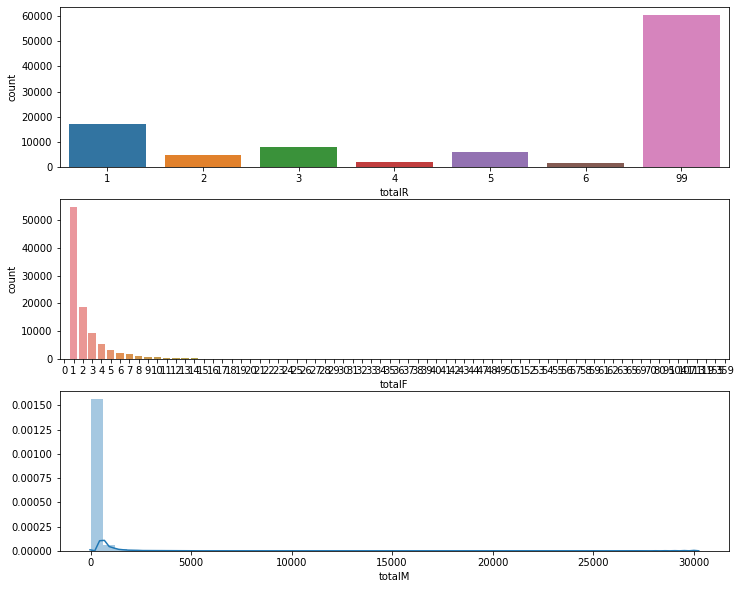

In [9]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1)
sns.countplot(df_rfm.totalR)
# Plot distribution of F
plt.subplot(3, 1, 2)
sns.countplot(df_rfm.totalF)
# Plot distribution of M
plt.subplot(3, 1, 3)
sns.distplot(df_rfm.totalM)
# Show the plot
plt.show()

## Group into RFM

In [10]:
# randomize the data
df_rfm = df_rfm.sample(frac=1,random_state=4211).reset_index(drop=True)

In [11]:
"""Algorithm for RFM segmentation with nested binning"""
# build a new dataframe for rfm
rfm = df_rfm[['totalR', 'totalF', 'totalM']]

# segment into 5 recency groups
r_labels = range(5, 0, -1)
recency = rfm['totalR'].rank(method='first') # prevent duplicates
r_quartiles = pd.qcut(recency, 5, labels=r_labels) # cut into 5 different groups
rfm = rfm.assign(R=r_quartiles.values) # add a new column

mini_df = list()
for i in range(1,6): # within each R, split into 10 F
    temp_f = rfm[rfm.R == i]
    f_labels = range(1, 6)
    frequency = temp_f['totalF'].rank(method='first') # prevent duplicates
    f_quartiles = pd.qcut(frequency, 5, labels=f_labels)
    temp_f = temp_f.assign(F=f_quartiles.values) # add a new column
    for i in range(1,6): # within each R and F, split into 10 M
        temp_m = temp_f[temp_f.F == i]
        m_labels = range(1, 6)
        monetary = temp_m['totalM'].rank(method='first') # prevent duplicates
        m_quartiles = pd.qcut(monetary, 5, labels=m_labels)
        temp_m = temp_m.assign(M=m_quartiles.values) # add a new column
        mini_df.append(temp_m)

In [12]:
"""Combine the R, F, M group generated into a single dataframe"""
full_rfm = pd.concat(mini_df)
full_rfm.sort_index(inplace=True)
df_rfm["R"] = full_rfm["R"]
df_rfm["F"] = full_rfm["F"]
df_rfm["M"] = full_rfm["M"]

## Likelihood of responding to marketing offers
Spring - any date before June 21 (inclusive)

Fall - any date after june 22 (inclusive)

In [13]:
# Calculate number of times customer is contacted
df_rfm["contacted"] = df_rfm.apply(lambda x: len(df_contacts[df_contacts.Cust_ID == x.Cust_ID]),axis = 1)

In [14]:
"""
This section makes use of the date where a customer is contacted and the date wherl a customer makes a purchase to
calculate the response variable. A response to marketing offer is considered only when a customer is both contacted and
made a purchase within the same season of the year, e.g. Fall 2007.
"""
def calc_response(row):
    responded = 0
    cust_id = row.Cust_ID
    contacts = df_contacts[df_contacts.Cust_ID == cust_id]
    F07 = dt.strptime("20070622","%Y%m%d")
    S07 = dt.strptime("20070101","%Y%m%d")
    F06 = dt.strptime("20060622","%Y%m%d")
    S06 = dt.strptime("20060101","%Y%m%d")
    F05 = dt.strptime("20050622","%Y%m%d")
    S05 = dt.strptime("20050101","%Y%m%d")
    F04 = dt.strptime("20040622","%Y%m%d")
    S04 = dt.strptime("20040101","%Y%m%d")
    seasons_contacted = set()
    
    for i,k in contacts.iterrows():
        date_str = str(k.ContactDate)
        date_dt = dt.strptime(date_str,"%Y%m%d")
        if date_dt >= F07:
            seasons_contacted.add("F07")
        elif date_dt >= S07:
            seasons_contacted.add("S07")
        elif date_dt >= F06:
            seasons_contacted.add("F06")
        elif date_dt >= S06:
            seasons_contacted.add("S06")
        elif date_dt >= F05:
            seasons_contacted.add("F05")
        elif date_dt >= S05:
            seasons_contacted.add("S05")
        elif date_dt >= F04:
            seasons_contacted.add("F04")
        elif date_dt >= S04:
            seasons_contacted.add("S04")
        else:
            seasons_contacted.add("P04")

    for ele in seasons_contacted:
        if ele == "F07":
            responded += row[3] + row[32] + row[69]
        elif ele == "S07":
            responded += row[6] + row[36] + row[73]
        elif ele == "F06":
            responded += row[9] + row[40] + row[77]
        elif ele == "S06":
            responded += row[12] + row[44] + row[81]
        elif ele == "F05":
            responded += row[15] + row[48] + row[85]
        elif ele =="S05":
            responded += row[18] + row[52] + row[89]
        elif ele == "F04":
            responded += row[21] + row[56] + row[93]
        elif ele =="S04":
            responded += row[24] + row[60] + row[97]
        else:
            responded += row[27] + row[64] + row[101]
    return responded

In [15]:
df_rfm["responded"] = 0
df_rfm["responded"] = df_rfm.apply(lambda x: calc_response(x), axis = 1)

In [17]:
"""Group by customer RFM and sort by percentage response"""
final_rfm = df_rfm[["Cust_ID","totalR","totalF","totalM","R","F","M","contacted","responded"]]
grouped_rfm = final_rfm.groupby(["R","F","M"]).sum()
grouped_rfm["percentage_response"] = grouped_rfm.apply(lambda row: row.responded/row.contacted*100 if\
                                                   row.contacted != 0\
                                                   else 0, axis=1)
grouped_rfm = grouped_rfm.sort_values(by=['percentage_response'], ascending=False)

In [24]:
grouped_rfm.drop(columns=["Cust_ID"])

,,,totalR,totalF,totalM,contacted,responded,percentage_response
R,F,M,,,,,,
5,5,5,823,13258,2008263,76235,5684,7.455893
3,5,5,79299,5367,567726,53521,3775,7.053306
5,5,1,911,6940,204882,32499,2192,6.744823
2,5,5,79299,5504,592899,55331,3713,6.710524
1,5,5,79299,5062,551893,56252,3610,6.417550
...,...,...,...,...,...,...,...,...
4,2,2,3359,800,24494,17354,0,0.000000
5,1,2,1064,800,20691,19445,0,0.000000
4,2,4,3314,800,55609,18923,0,0.000000


# Top 5 Groups

In [25]:
grouped_rfm.iloc[:5].drop(columns=["Cust_ID","totalR","totalF","totalM"])

,,,contacted,responded,percentage_response
R,F,M,,,
5,5,5,76235,5684,7.455893
3,5,5,53521,3775,7.053306
5,5,1,32499,2192,6.744823
2,5,5,55331,3713,6.710524
1,5,5,56252,3610,6.417550


# Bottom 5 Groups

In [27]:
grouped_rfm[len(grouped_rfm)-5:].drop(columns=["Cust_ID","totalR","totalF","totalM"])

contacted  responded  percentage_response
R F M                                           
4 2 2      17354          0                  0.0
5 1 2      19445          0                  0.0
4 2 4      18923          0                  0.0
    5      21456          0                  0.0
5 1 1       6260          0                  0.0